# Creating the new grid where only the top cell is changed

This code creates a new vertical grid for the experiment 5mtop, where the difference from 5mdz is that only the topmost cell was changes to have 5m depth.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import cmocean as cm
import xarray as xr
import numpy as np
import IPython.display

Grids are

In [3]:
#KDS75 original ryf grid
Vgrid_KDS75=xr.open_dataset('/home/156/wf4500/access-om2-01/ryf/localinput/ocean_vgrid.nc')
Vgrid_KDS75_dz=xr.open_dataset('/home/156/wf4500/access-om2-01/ryf/localinput/ocean_vgrid_dz_1_to_200m_6000m_75lev.nc')
#5mdz grid
Vgrid_5mdz=xr.open_dataset('/home/156/wf4500/access-om2-01/ryf_5mdz/localinput/ocean_vgrid.nc')
Vgrid_5mdz_dz=xr.open_dataset('/home/156/wf4500/access-om2-01/ryf_5mdz/localinput/ocean_vgrid_dz_1_to_200m_6000m_75lev.nc')

In [4]:
top_KDS75=Vgrid_KDS75.zeta[0:-1:2]
centre_KDS75=Vgrid_KDS75.zeta[1:-1:2]
bottom_KDS75=Vgrid_KDS75.zeta[2:151:2]
top_KDS75[:10],centre_KDS75[:10],bottom_KDS75[3:]

(<xarray.DataArray 'zeta' (nzv: 10)>
 [10 values with dtype=float64]
 Dimensions without coordinates: nzv
 Attributes:
     units:          meters
     standard_name:  vertical_grid_vertex
     long_name:      vgrid
     author:         Kial Stewart,
 <xarray.DataArray 'zeta' (nzv: 10)>
 [10 values with dtype=float64]
 Dimensions without coordinates: nzv
 Attributes:
     units:          meters
     standard_name:  vertical_grid_vertex
     long_name:      vgrid
     author:         Kial Stewart,
 <xarray.DataArray 'zeta' (nzv: 72)>
 [72 values with dtype=float64]
 Dimensions without coordinates: nzv
 Attributes:
     units:          meters
     standard_name:  vertical_grid_vertex
     long_name:      vgrid
     author:         Kial Stewart)

Making the new 5mtop cell grid:

In [5]:
top_halfmtop=xr.concat((top_KDS75[0],top_KDS75),dim='nzv')
top_halfmtop[1]=np.array(top_halfmtop[1:3].mean())
top_halfmtop

#Bottom of the first cell is the top of the second cell
bottom_halfmtop=xr.concat((bottom_KDS75[0],bottom_KDS75),dim='nzv')
bottom_halfmtop[0]=top_halfmtop[1]


#Centre of the first cell will be the average betwen the bottom and top of first cell
centre_halfmtop=xr.concat((centre_KDS75[0],centre_KDS75),dim='nzv')
centre_halfmtop[0]=(top_halfmtop[0] + bottom_halfmtop[0])/2
#second cell is also changed thickness. its centre will be the average between the top and bottom of the second cell
centre_halfmtop[1]=(top_halfmtop[1] + bottom_halfmtop[1])/2

How do they look?

Text(0.5, 1.0, '[c] Centre of cells')

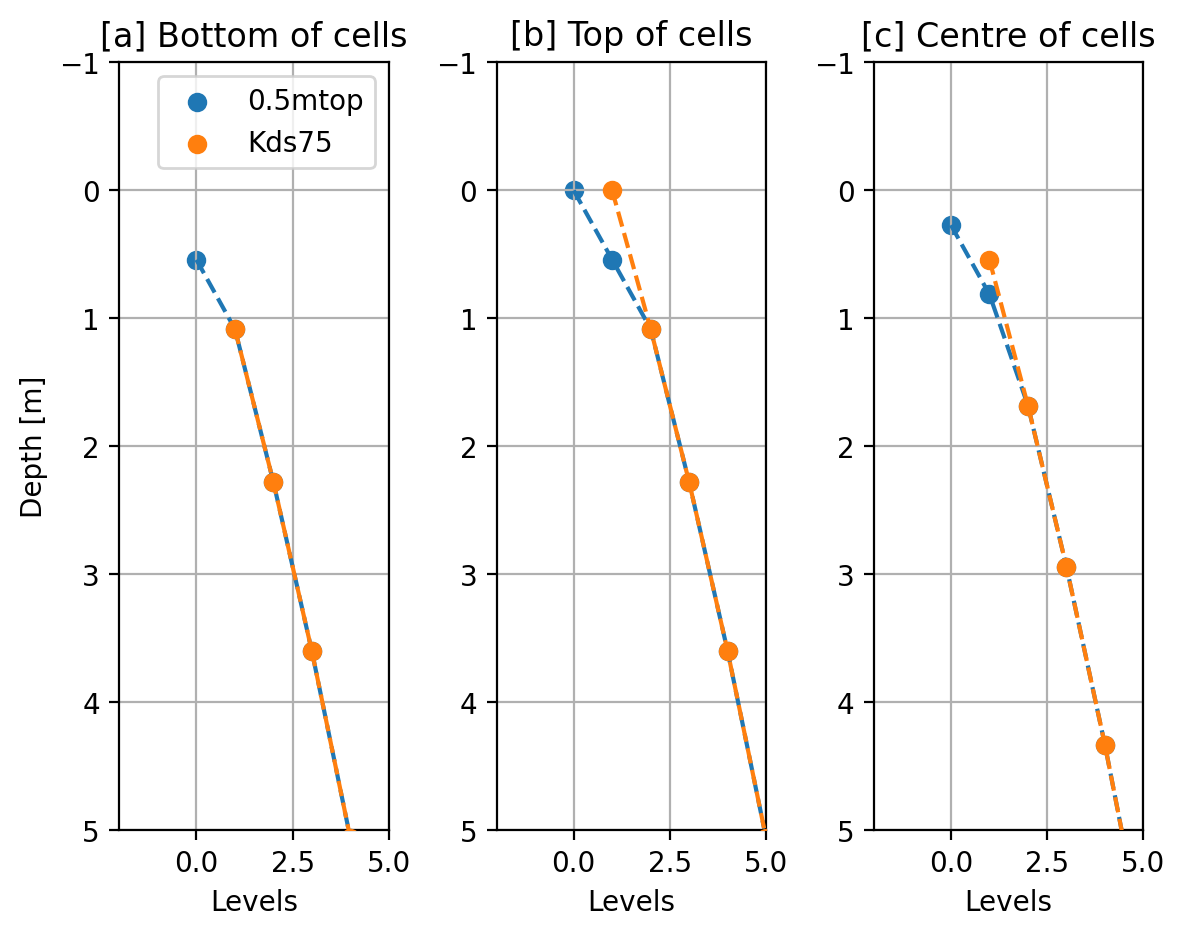

In [6]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(1,3,1)
plt.scatter(range(76),bottom_halfmtop,label='0.5mtop')
plt.plot(range(76),bottom_halfmtop,color='tab:blue',linestyle='--')

plt.scatter(np.arange(75)+1,bottom_KDS75,label='Kds75',zorder=3)
plt.plot(np.arange(75)+1,bottom_KDS75,color='tab:orange',linestyle='--',zorder=4)


plt.ylim(5,-1); plt.grid(); plt.legend(); plt.xlim(-2,5)
plt.ylabel('Depth [m]'); plt.xlabel('Levels');
plt.title('[a] Bottom of cells')


plt.subplot(1,3,2)
plt.scatter(range(76),top_halfmtop,label='0.5mtop')
plt.plot(range(76),top_halfmtop,color='tab:blue',linestyle='--')

plt.scatter(np.arange(75)+1,top_KDS75,label='Kds75',zorder=3)
plt.plot(np.arange(75)+1,top_KDS75,color='tab:orange',linestyle='--',zorder=4)


plt.ylim(5,-1); plt.grid(); plt.xlim(-2,5)
plt.xlabel('Levels');
plt.title('[b] Top of cells')


plt.subplot(1,3,3)
plt.scatter(range(76),centre_halfmtop,label='0.5mtop')
plt.plot(range(76),centre_halfmtop,color='tab:blue',linestyle='--')

plt.scatter(np.arange(75)+1,centre_KDS75,label='Kds75',zorder=3)
plt.plot(np.arange(75)+1,centre_KDS75,color='tab:orange',linestyle='--',zorder=4)


plt.ylim(5,-1); plt.grid(); plt.xlim(-2,5)
plt.xlabel('Levels');
plt.title('[c] Centre of cells')

It seems like the cells are correctly placed

lets create the new grid file

MOM grids have [top,centre,bottom/top,centre,bottom/top...] configuration. Taking that into account, our final grid with one extra cell now, should be expanded to account for the new cell by adding 2 extra values (top and centre of the intermediate cell. 

In [7]:
#THis step is just to expand the amtrix. we will replace the values to the correct ones.
Vgrid_halfmtop=xr.concat((Vgrid_KDS75.isel(nzv=slice(0,2)),Vgrid_KDS75),dim='nzv')


Now, lets create the new zeta, which will be

In [8]:
new_zeta=np.sort(np.append(np.append(top_halfmtop,centre_halfmtop),bottom_halfmtop[-1]))

Lets compare the zeta to see if everything is ok before substituting

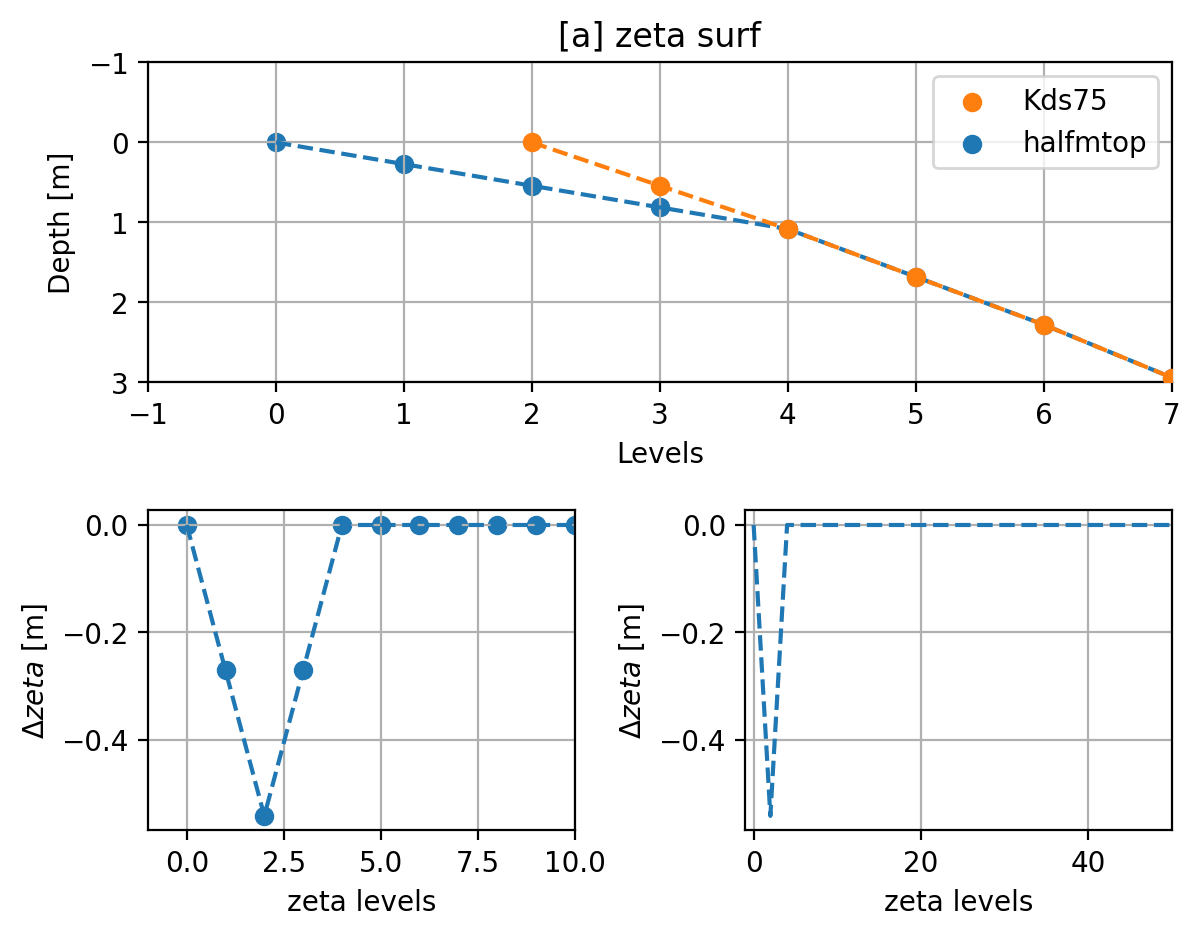

In [9]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.subplot(2,1,1)

plt.scatter(np.arange(151)+2,Vgrid_KDS75.zeta,label='Kds75',color='tab:orange',zorder=3)
plt.plot(np.arange(151)+2,Vgrid_KDS75.zeta,color='tab:orange',linestyle='--',zorder=3)

plt.scatter(np.arange(153),new_zeta,label='halfmtop',color='tab:blue')
plt.plot(np.arange(153),new_zeta,color='tab:blue',linestyle='--')

plt.ylim(3,-1);
plt.xlim(-1,7)
plt.grid(); plt.legend(); 
plt.ylabel('Depth [m]'); plt.xlabel('Levels');
plt.title('[a] zeta surf')


plt.subplot(2,2,3)

plt.scatter(np.arange(153),np.hstack((0,0,Vgrid_KDS75.zeta))-new_zeta,color='tab:blue')
plt.plot(np.arange(153),np.hstack((0,0,Vgrid_KDS75.zeta))-new_zeta,color='tab:blue',linestyle='--', label='delta zeta')
plt.xlim(-1,10)
plt.grid(); 
plt.ylabel(r"$\Delta zeta$ [m]"); plt.xlabel('zeta levels');


plt.subplot(2,2,4)


plt.plot(np.arange(153),np.hstack((0,0,Vgrid_KDS75.zeta))-new_zeta,color='tab:blue',linestyle='--', label='delta zeta')
plt.xlim(-1,50)
plt.grid(); 
plt.ylabel(r"$\Delta zeta$ [m]"); plt.xlabel('zeta levels');




Lets now substitute the new zeta into the grid file

In [10]:
#Vgrid_5mtop.assign(zeta=new_zeta)
Vgrid_halfmtop['zeta'].values=np.array(new_zeta)

Now we can just save it in the netcdf

In [12]:
outpath='/home/156/wf4500/vgrid_halftop.nc'
#Vgrid_halfmtop.to_netcdf(outpath)

It seems to have worked. Gonna let that set up for when I come back try to make a new run

After saving this output, I adjusted the precision of the ZT variable, so the model don't crash when calculating the pressure for the initial density. The final corrected vertical coordinate file is the same, as it was **substituted**. 

algorythm to correct the precision [here](https://aus01.safelinks.protection.outlook.com/?url=https%3A%2F%2Fgithub.com%2FCOSIMA%2Ftopogtools%2Fblob%2Fmaster%2Ffloat_vgrid.f90&data=05%7C01%7Cwilton.aguiar%40anu.edu.au%7Cae13026d67584649f56208dba2aba7c3%7Ce37d725cab5c46249ae5f0533e486437%7C0%7C0%7C638282630358665036%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C3000%7C%7C%7C&sdata=5yevCsh1AWzyCmFTpc7ZFP5S4O6QE3NIGv5IpniNS74%3D&reserved=0)



description of the problem [here](https://aus01.safelinks.protection.outlook.com/?url=https%3A%2F%2Fgithub.com%2FCOSIMA%2Faccess-om2%2Fissues%2F161&data=05%7C01%7Cwilton.aguiar%40anu.edu.au%7Cae13026d67584649f56208dba2aba7c3%7Ce37d725cab5c46249ae5f0533e486437%7C0%7C0%7C638282630358665036%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C3000%7C%7C%7C&sdata=cRWFRBqNE61O0eaf75HkEcYxHbExy7IKqHJtA86VPuU%3D&reserved=0)


The new gris in the directory in bold should be the one used to interpolate the restart.

## Additional step: Creating the new TS initial conditions for halfmtop run



In [13]:
import netCDF4
import xesmf as xe
from itertools import cycle
import os
import dask
import IPython.display
import pandas as pd
import dask.array as da
import dask.bag as db
from pykdtree.kdtree import KDTree
from dask.diagnostics import ProgressBar
import subprocess
from glob import glob

import logging
logging.getLogger('distributed.utils_perf').setLevel(logging.ERROR)

xr.set_options(keep_attrs=True) ## This ensures that performing simple operations with xarray (eg converting temperature to Celsius) preserves attributes

from dask.distributed import Client
client = Client()
client

<Client: 'tcp://127.0.0.1:40473' processes=7 threads=28, memory=251.20 GiB>

Importing the original IC for OM2-01, with 75 levels.

In [14]:
ACCESS_OM2_temp = xr.open_dataset("/g/data/ik11/inputs/access-om2/input_08022019/mom_01deg/ocean_temp_salt.res.nc")
ACCESS_OM2_temp = ACCESS_OM2_temp.temp.isel(time=0).squeeze() 


ACCESS_OM2_salt = xr.open_dataset("/g/data/ik11/inputs/access-om2/input_08022019/mom_01deg/ocean_temp_salt.res.nc")
ACCESS_OM2_salt = ACCESS_OM2_salt.salt.isel(time=0).squeeze()

data_in = xr.Dataset({'temp': ACCESS_OM2_temp,'salt':ACCESS_OM2_salt})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xarray/core/indexing.py:556: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_

Notice that the targer grid file below differs from the one created above, because we ran the float_vgrid tool from topogtools, to fix the double precision of the grid.

In [15]:
# target grid (t points)

dg = xr.open_dataset("/home/156/wf4500/vgrid_halftop.nc") #the new grid
dg = (
    dg[["zeta"]]
    .isel(nzv=slice(1, None, 2))
    .rename(zeta="ZT",nzv='ZT')
)


outgrid = data_in.drop_vars('temp').drop_vars('salt').drop_vars('ZT')

outgrid['ZT']=dg['ZT']
outgrid

<xarray.Dataset>
Dimensions:   (GRID_X_T: 3600, GRID_Y_T: 2700, ZT: 76)
Coordinates:
  * GRID_X_T  (GRID_X_T) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * GRID_Y_T  (GRID_Y_T) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    time      object 0001-01-02 12:00:00
  * ZT        (ZT) float64 0.2706 0.8119 1.681 ... 5.313e+03 5.511e+03 5.709e+03
Data variables:
    *empty*

In [16]:
#grids for xarray interp
lon=outgrid['GRID_X_T']
lat=outgrid['GRID_Y_T']
zout=outgrid['ZT']
zin=data_in['ZT']

In [17]:
data_out=data_in.interp(GRID_X_T=lon,GRID_Y_T=lat,ZT=zout)

In [18]:
#First level is too shallow for the interp, so we are jusrt repeating teh second layer
data_out['temp'][0]=data_out['temp'].isel(ZT=1)
data_out['salt'][0]=data_out['salt'].isel(ZT=1)

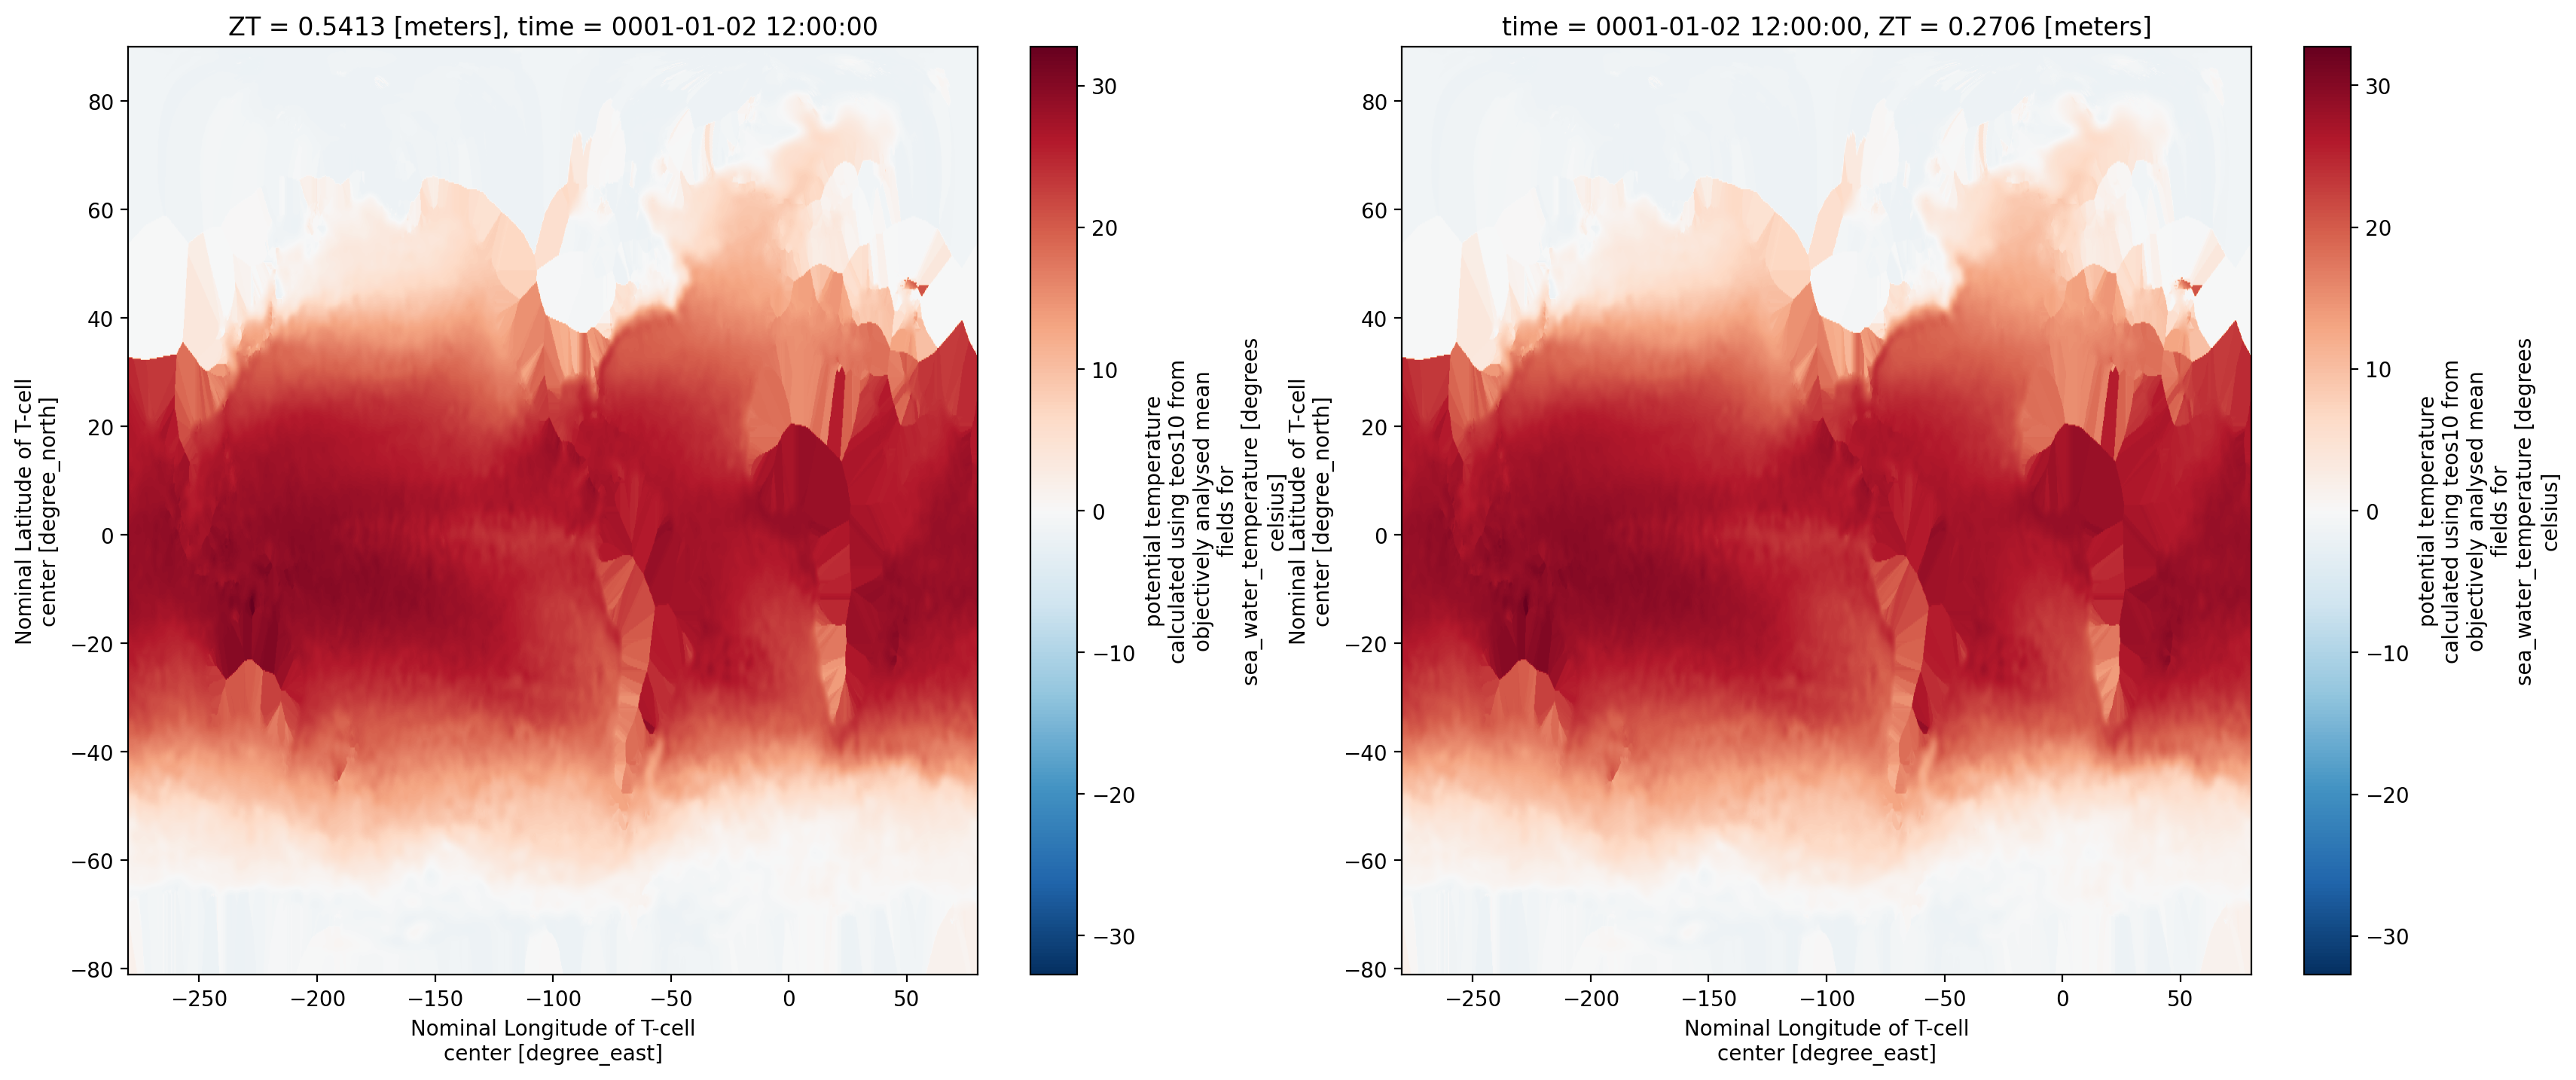

In [19]:
#plotting data - surface temp
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
#input data
data_in['temp'].isel(ZT=0).plot(ax=ax1)
#output data
data_out['temp'].isel(ZT=0).plot(ax=ax2)

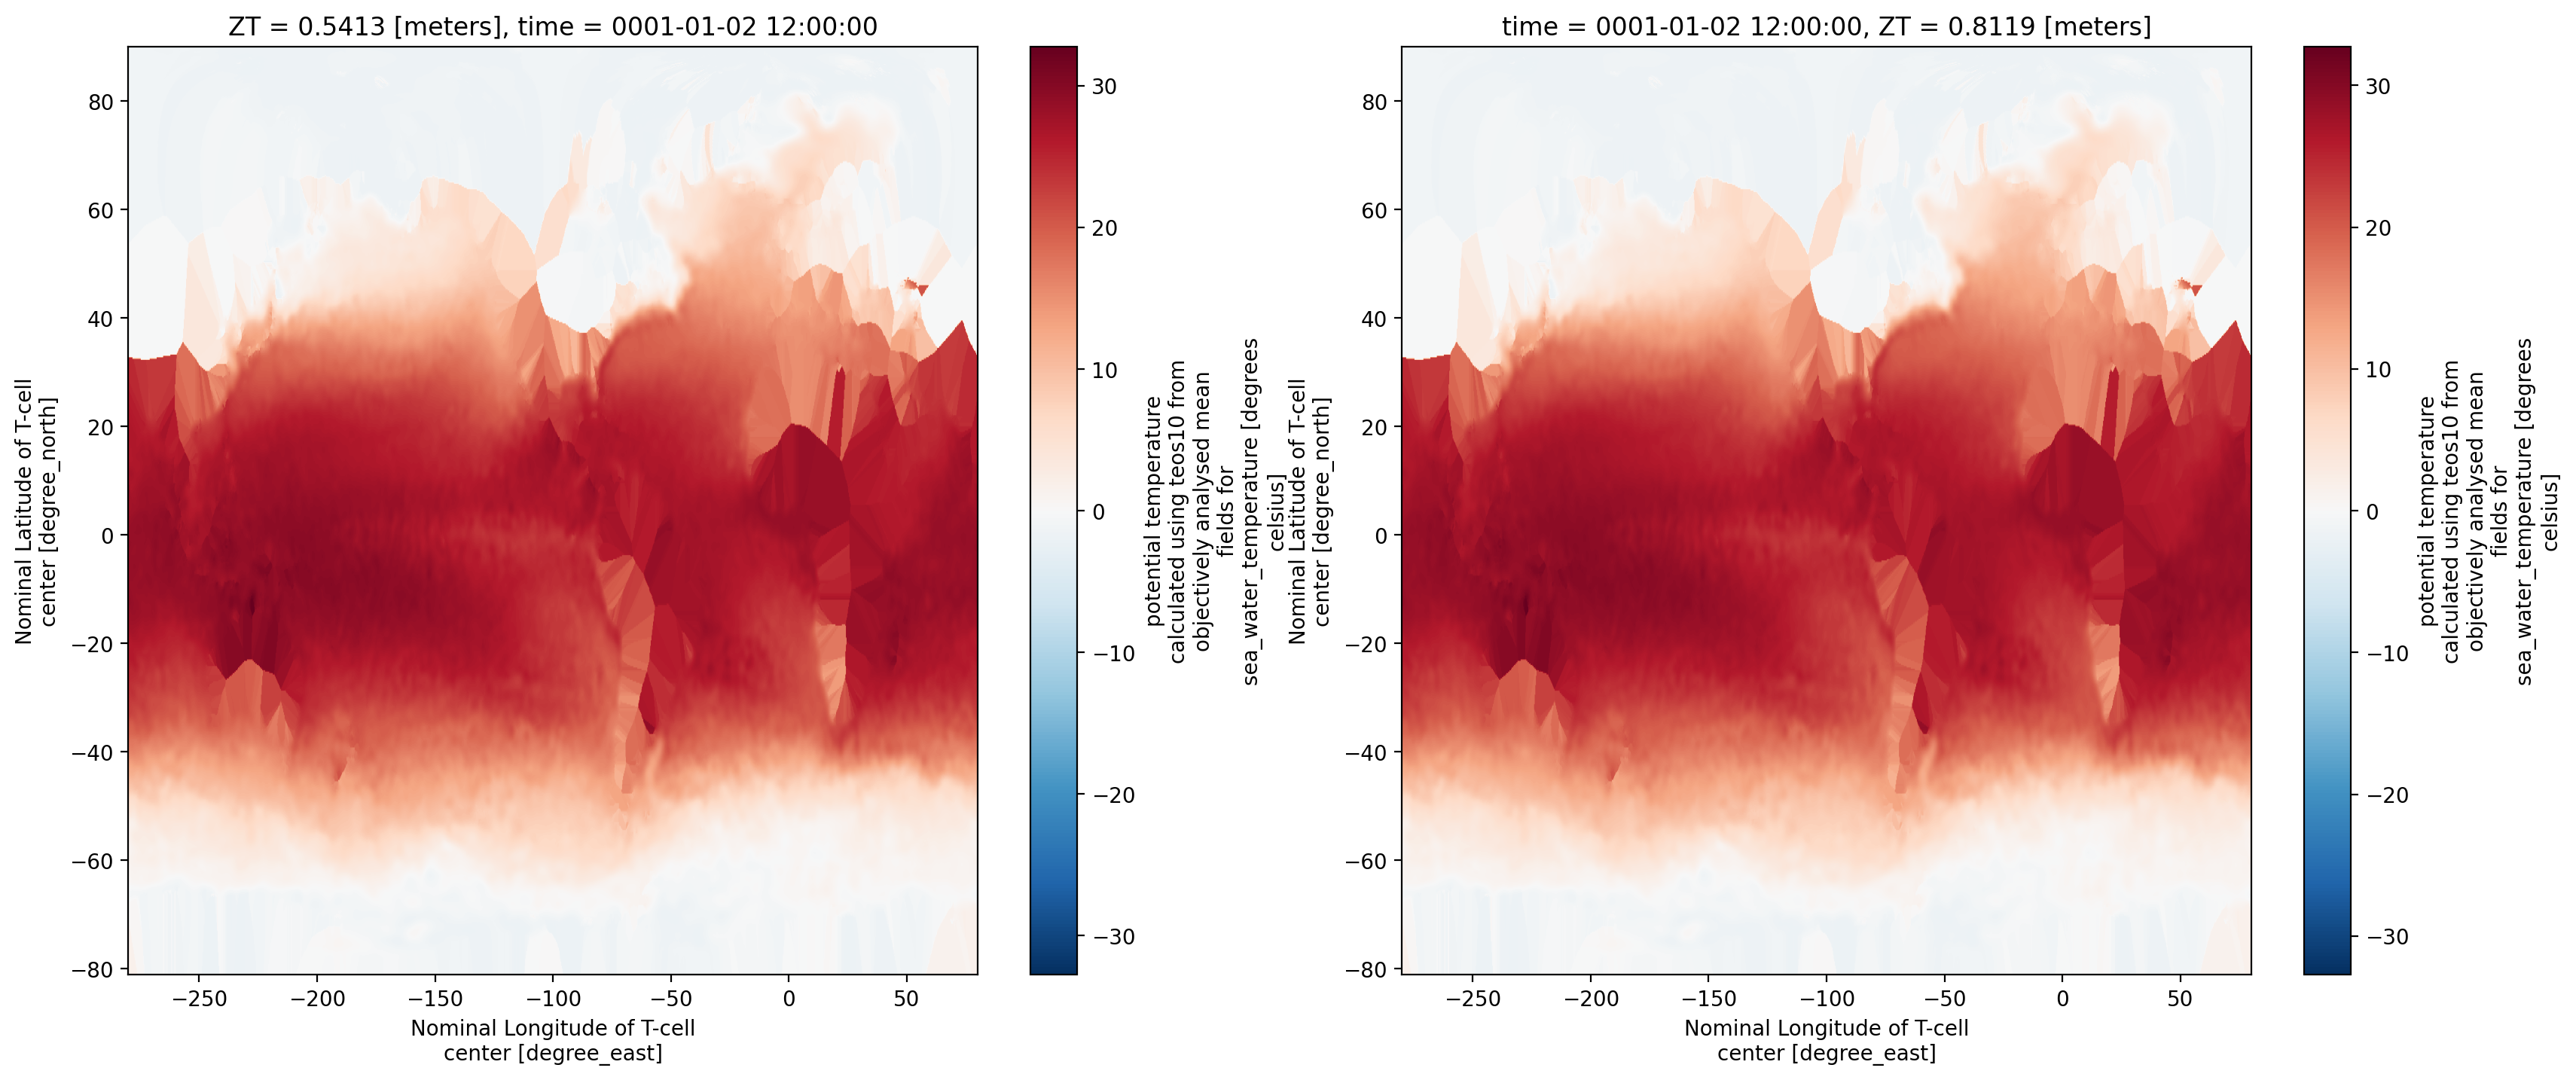

In [20]:
#plotting data - surface temp in out, 3rd layer in in
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
#input data
data_in['temp'].isel(ZT=0).plot(ax=ax1)
#output data
data_out['temp'].isel(ZT=1).plot(ax=ax2)

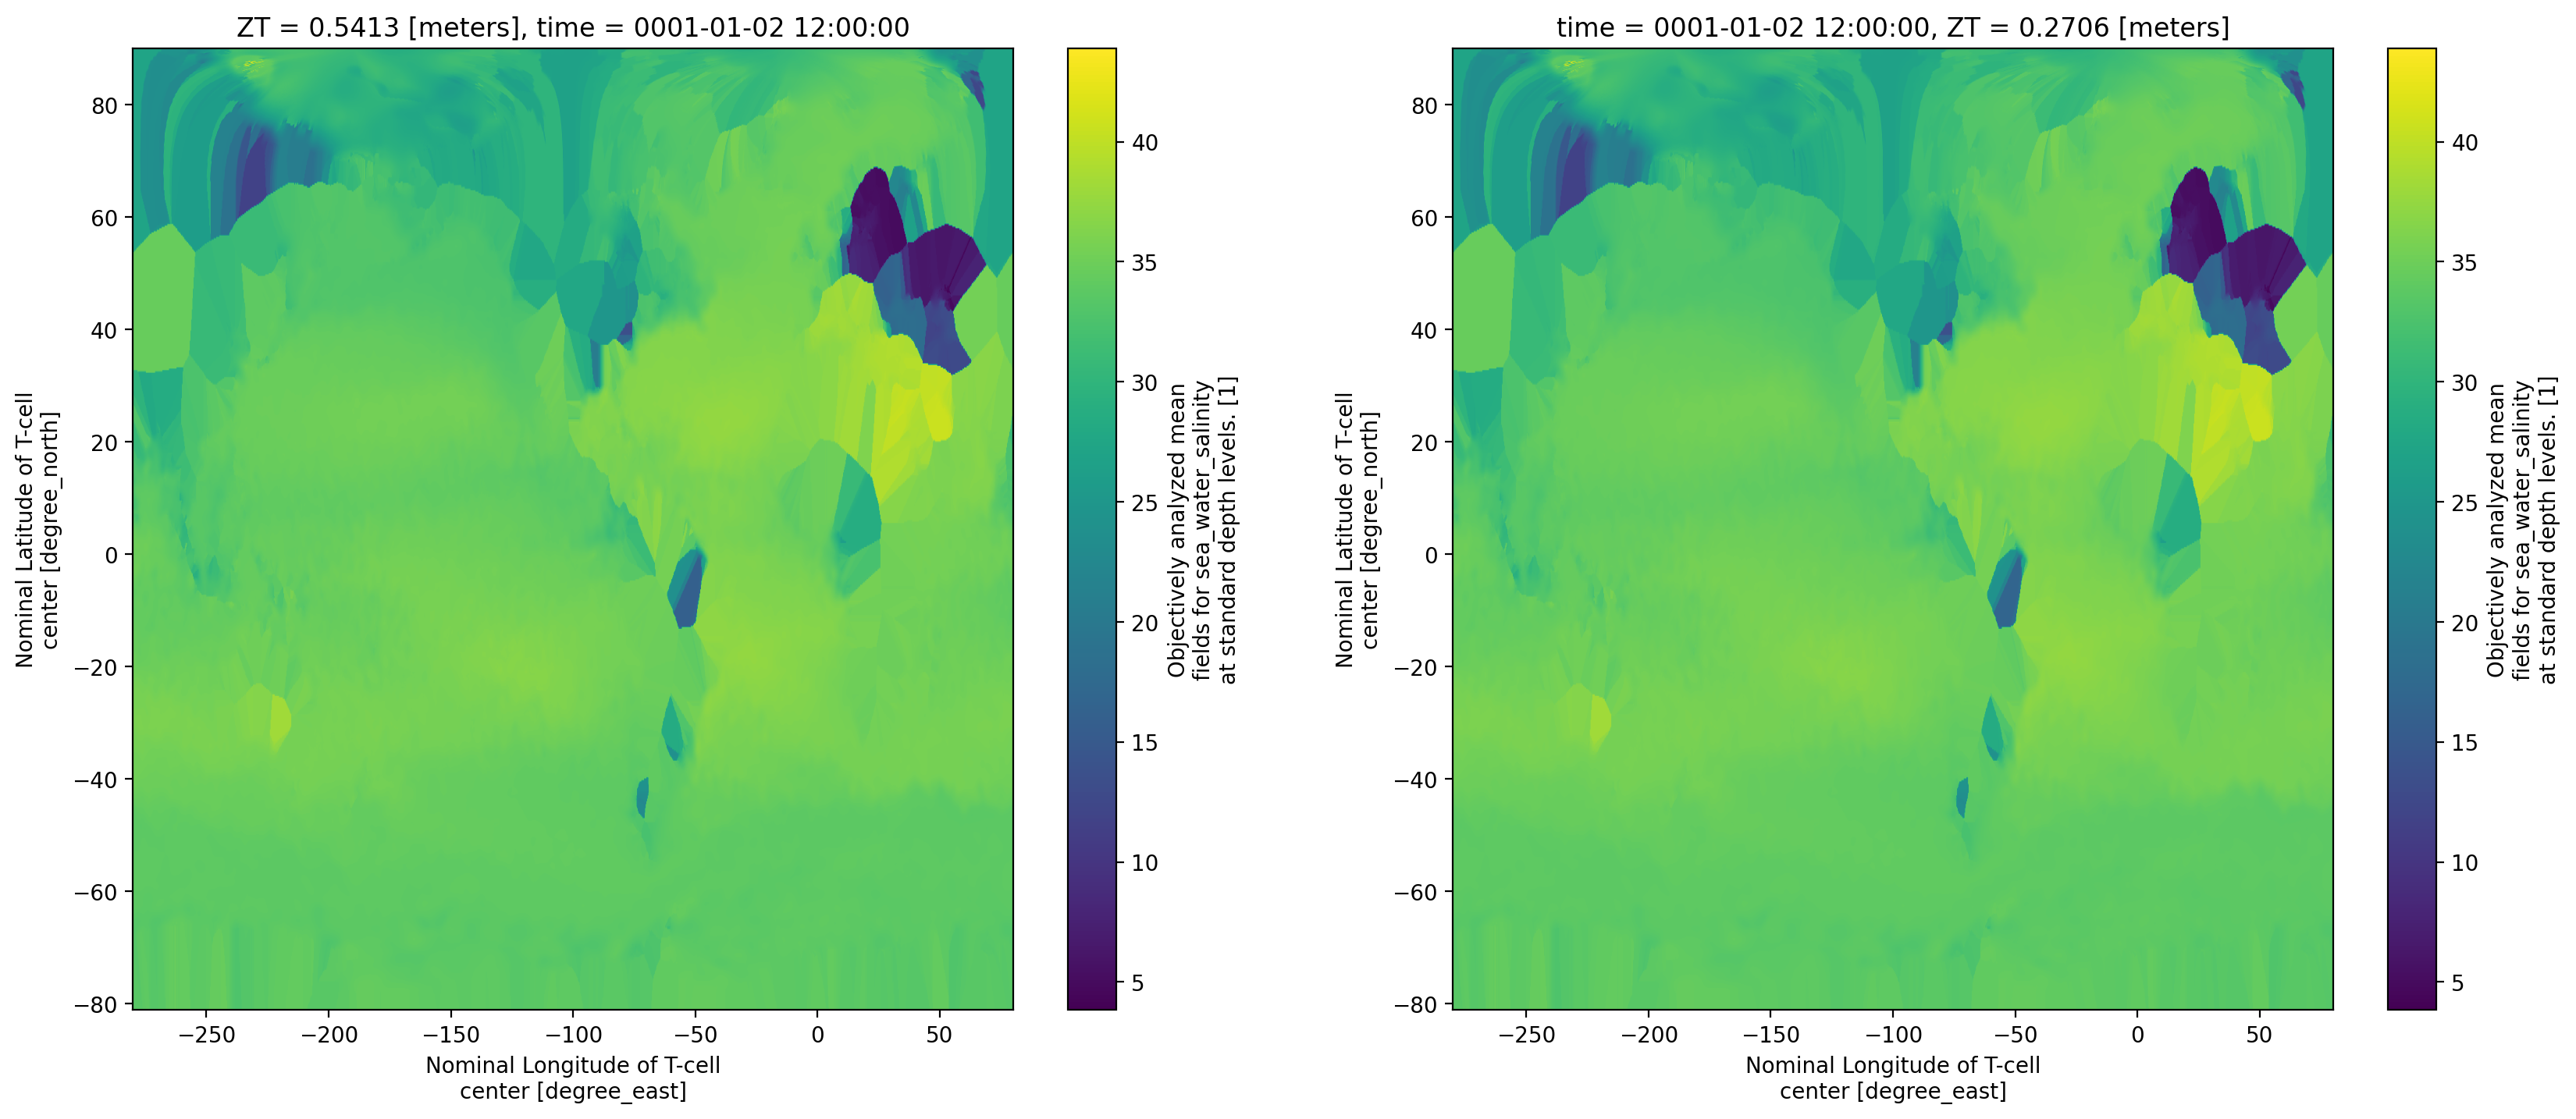

In [21]:
#plotting data - surface Salinity
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
#input data
data_in['salt'].isel(ZT=0).plot(ax=ax1)
#output data
data_out['salt'].isel(ZT=0).plot(ax=ax2)

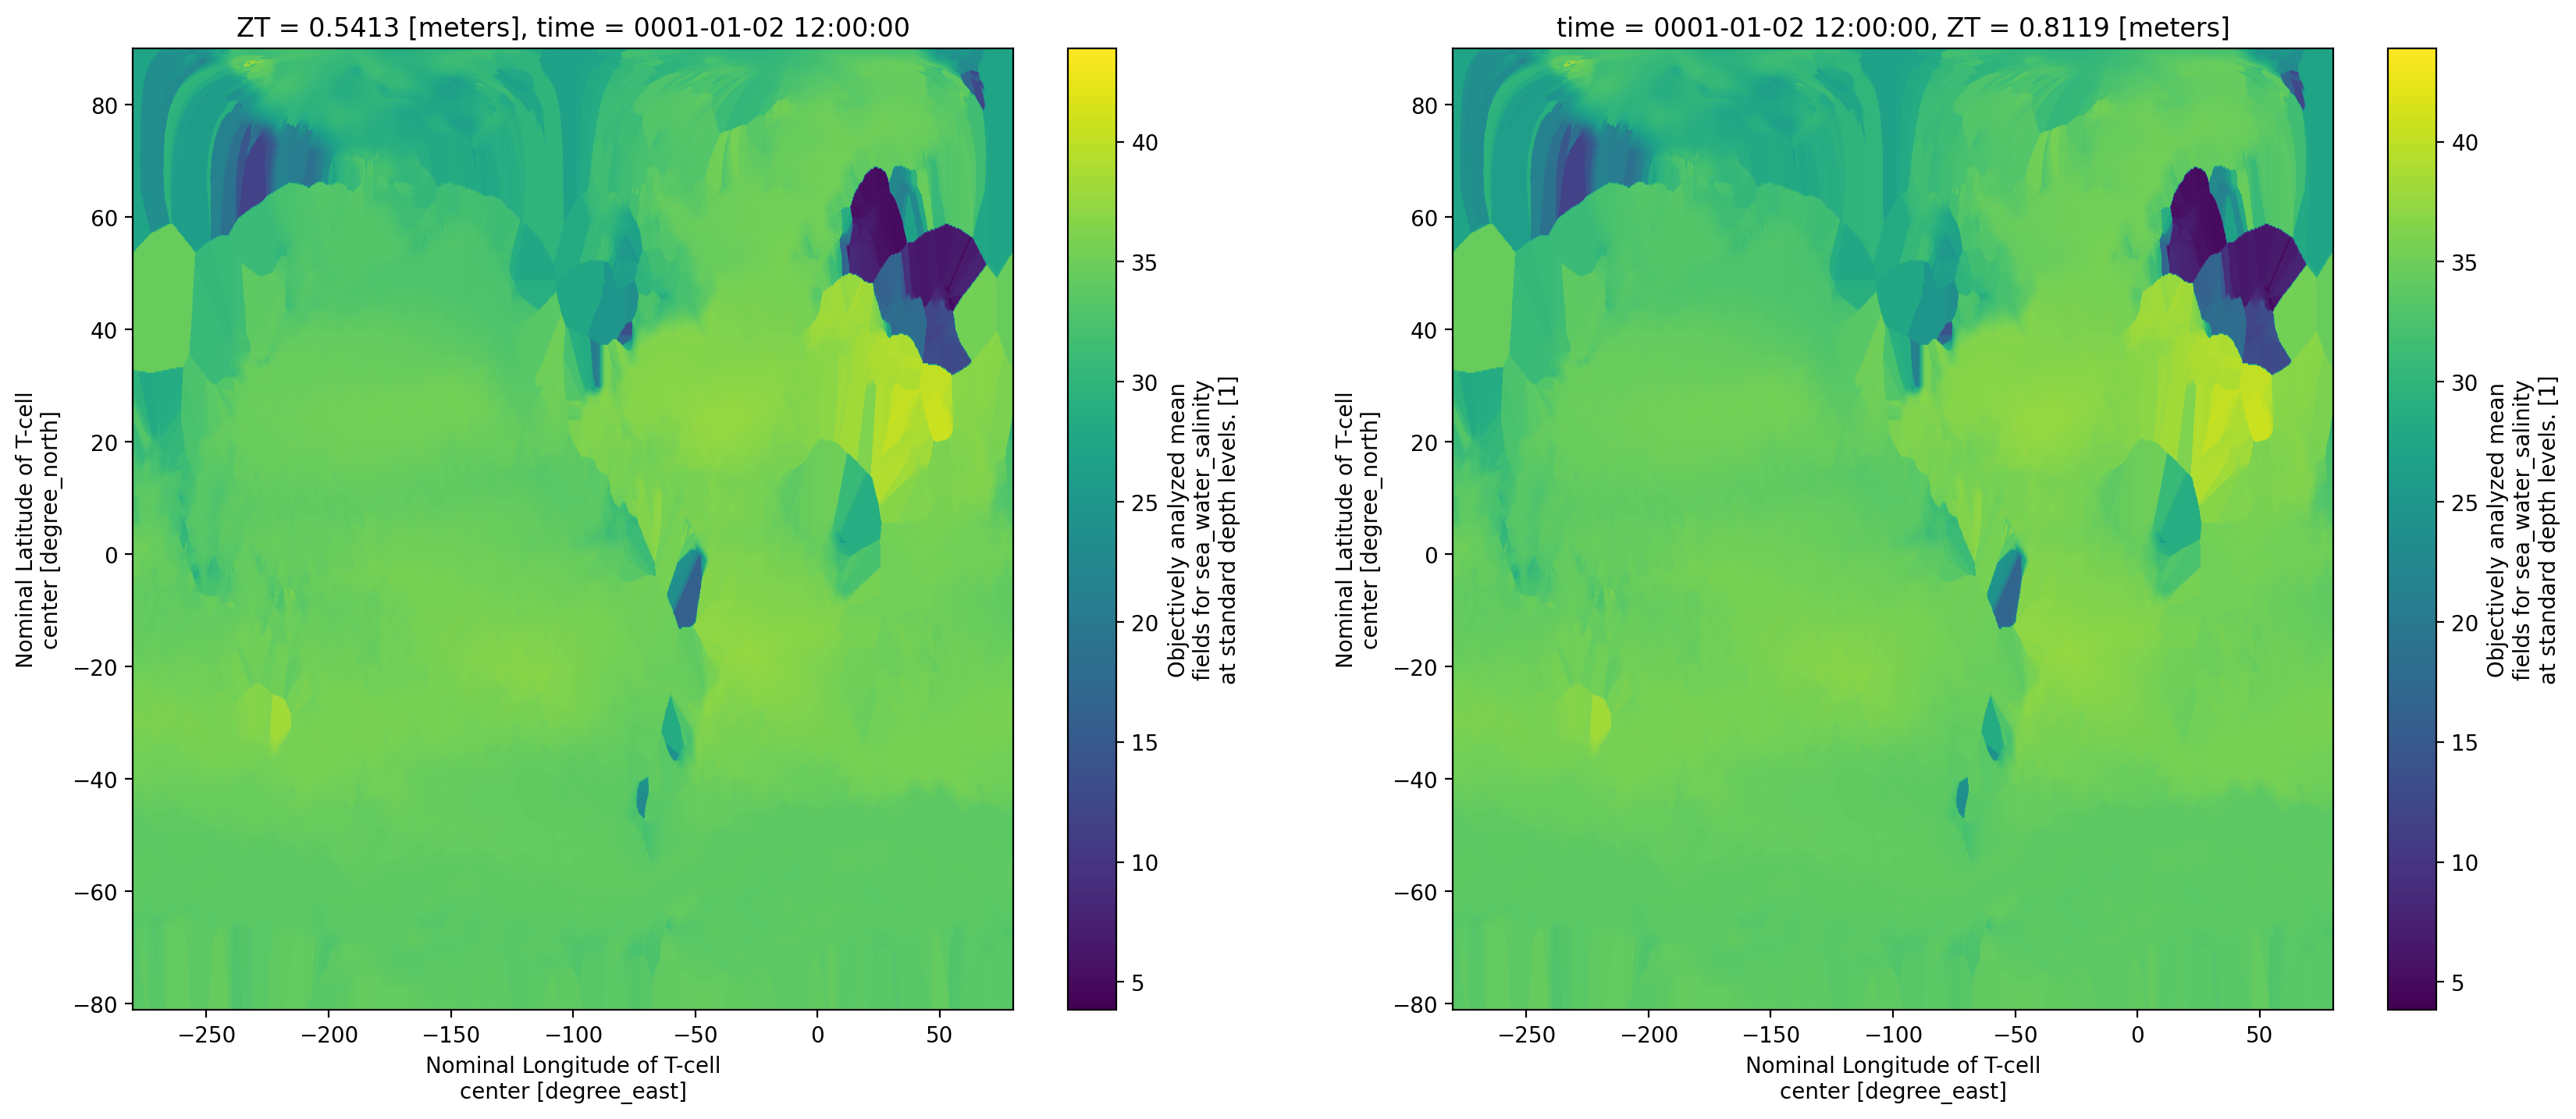

In [22]:
#plotting data - surface Salinity
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
#input data
data_in['salt'].isel(ZT=0).plot(ax=ax1)
#output data
data_out['salt'].isel(ZT=1).plot(ax=ax2)

scatter plots for the surface salinity and temperature to check of they are correct and or make sense

In [23]:
#max salinities between grids
data_in.salt.isel(ZT=0).max().values, data_out.salt.isel(ZT=0).max().values

(array(43.88302932), array(43.88252034))

In [24]:
#min salinities between grids
data_in.salt.isel(ZT=0).min().values, data_out.salt.isel(ZT=0).min().values

(array(3.84259369), array(3.84356316))

In [25]:
#max temperature between grids
data_in.temp.isel(ZT=0).max().values, data_out.temp.isel(ZT=0).max().values

(array(32.7410157), array(32.72466747))

In [26]:
#min temperature between grids
data_in.temp.isel(ZT=0).min().values, data_out.temp.isel(ZT=0).min().values

(array(-2.02349039), array(-2.02349039))

Text(0, 0.5, 'regridded 2.5m')

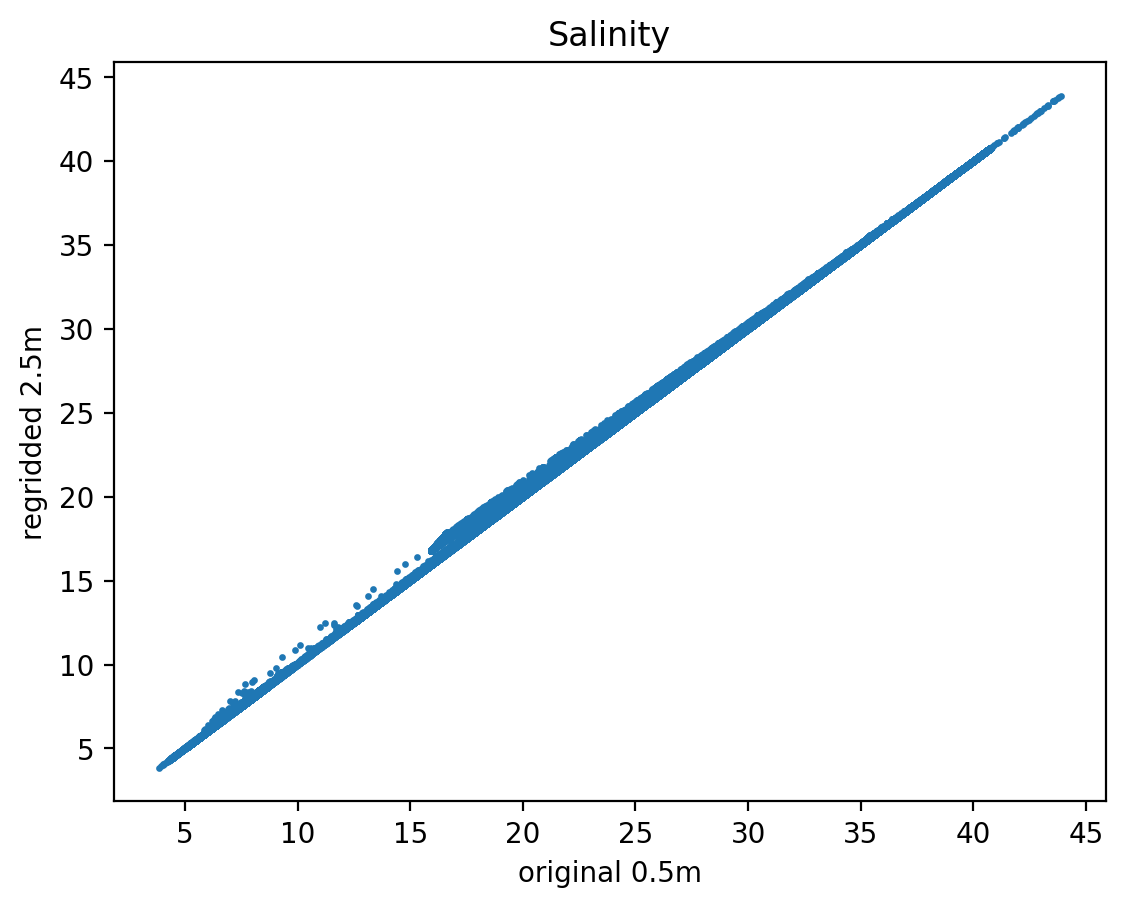

In [27]:
plt.scatter(data_in.salt.isel(ZT=0),data_out.salt.isel(ZT=0),s=2)
plt.title('Salinity')
plt.xlabel('original 0.5m')
plt.ylabel('regridded 2.5m')

Text(0, 0.5, 'regridded 2.5m')

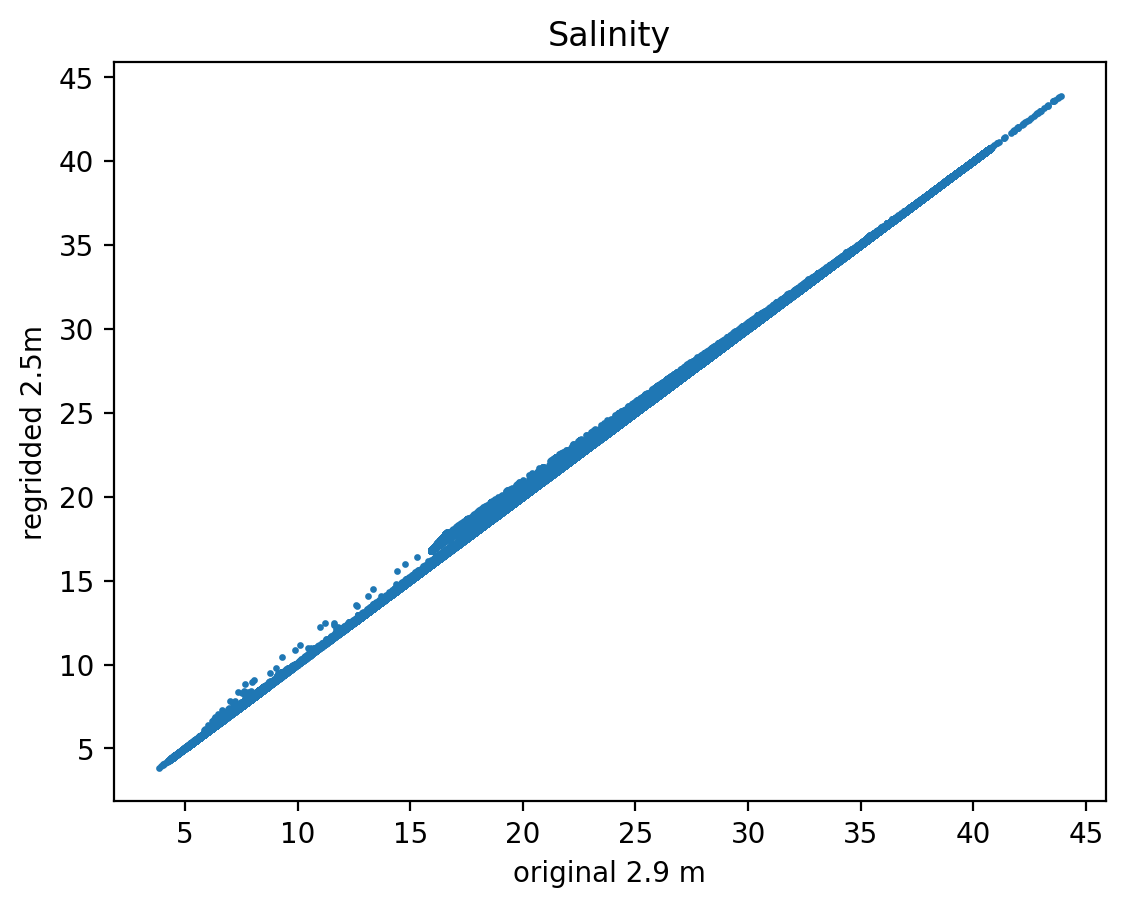

In [28]:
plt.scatter(data_in.salt.isel(ZT=0),data_out.salt.isel(ZT=1),s=2)
plt.title('Salinity')
plt.xlabel('original 2.9 m')
plt.ylabel('regridded 2.5m')

Text(0, 0.5, 'regridded 2.5m')

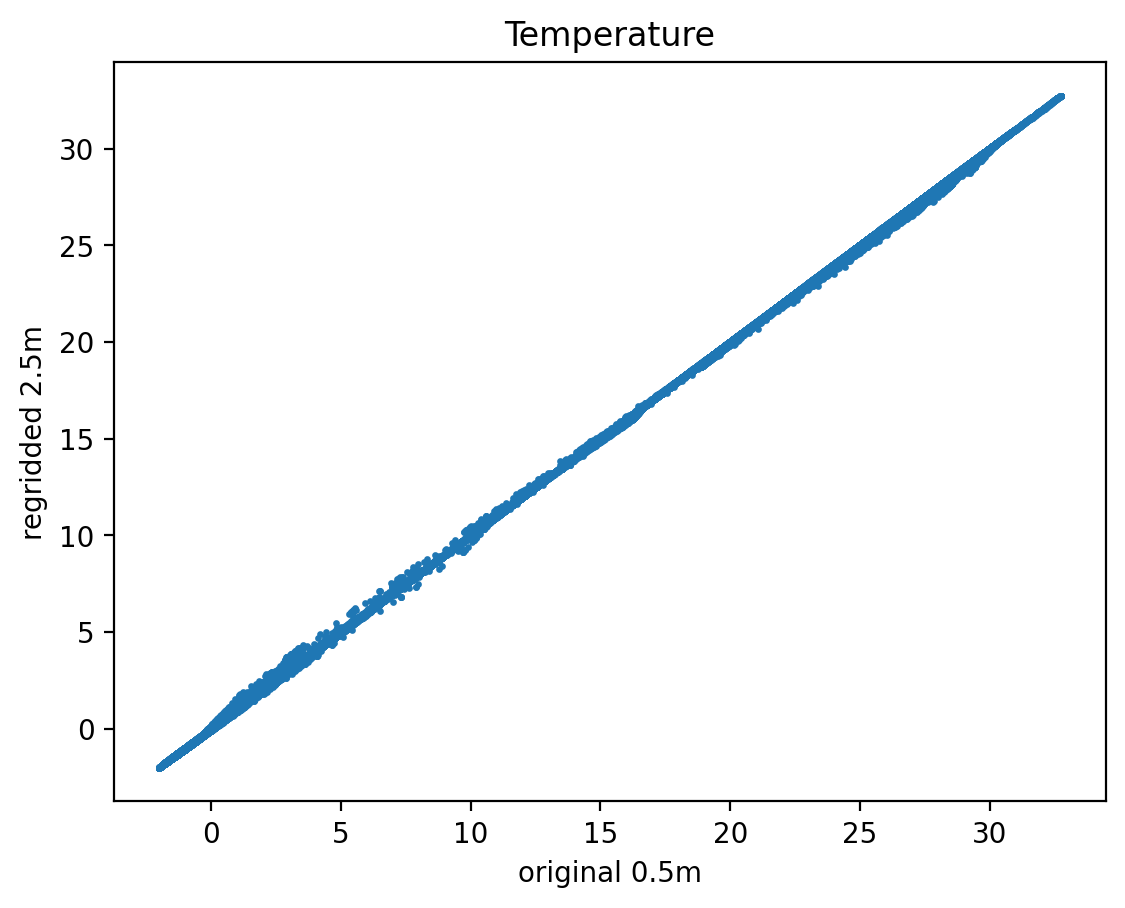

In [29]:
plt.scatter(data_in.temp.isel(ZT=0),data_out.temp.isel(ZT=0),s=2)
plt.title('Temperature')
plt.xlabel('original 0.5m')
plt.ylabel('regridded 2.5m')

Text(0, 0.5, 'regridded 2.5m')

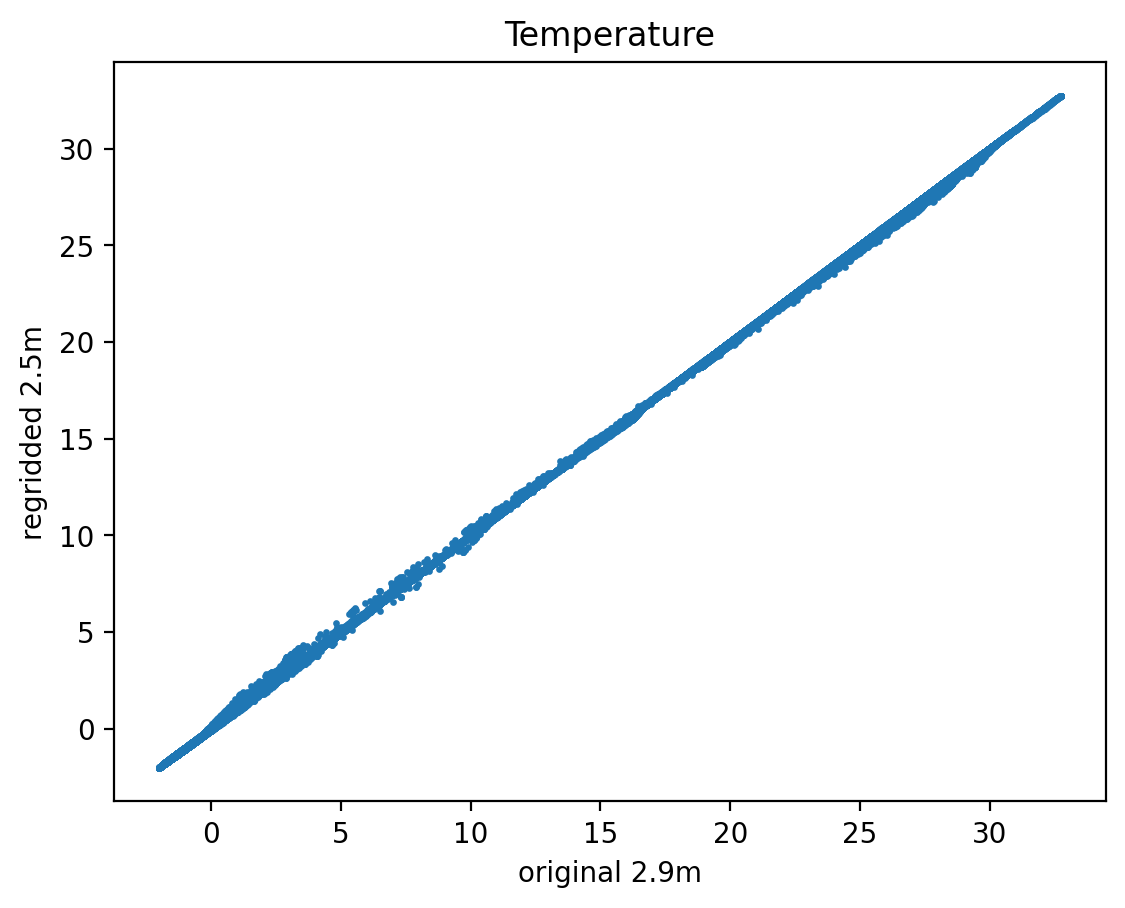

In [30]:
plt.scatter(data_in.temp.isel(ZT=0),data_out.temp.isel(ZT=1),s=2)
plt.title('Temperature')
plt.xlabel('original 2.9m')
plt.ylabel('regridded 2.5m')

Text(0, 0.5, 'regridded 2.5m')

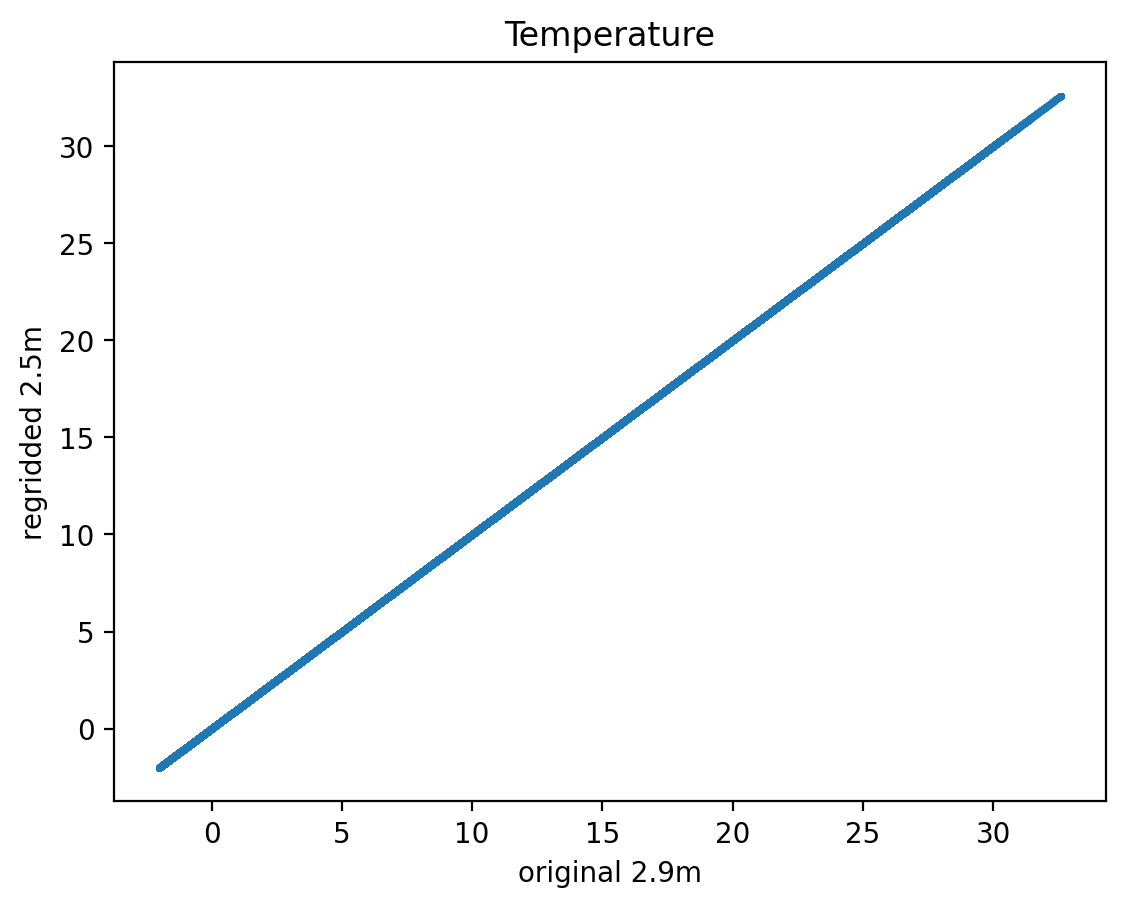

In [31]:
plt.scatter(data_in.temp.isel(ZT=2),data_out.temp.isel(ZT=3),s=2)
plt.title('Temperature')
plt.xlabel('original 2.9m')
plt.ylabel('regridded 2.5m')

Saving files

In [32]:
#saving
enc = {
    "_FillValue": -1.e+34
}

# Make them doubles:
data_out['temp'] = data_out['temp'].astype('double')
data_out['salt'] = data_out['salt'].astype('double')


data_out.to_netcdf("/g/data/v45/wf4500/DSW_collaborative/vertical_grid_for_ocean_models/ocean_temp_salt.res_76lv_precison.nc", encoding={"temp": enc, "salt": enc})

In [180]:
np.single(data_out.ZT[0])

0.27064037

## Checking the changes in topog and masks, to we need to adjust it?

In [42]:
Topog_21m = xr.open_dataset('/home/156/wf4500/access-om2-01/ryf/newtopo/topog_kds5mdz2_partial_nonadvective.nc')


<xarray.Dataset>
Dimensions:  (yy: 2700, xx: 3600)
Dimensions without coordinates: yy, xx
Data variables:
    depth    (yy, xx) float32 ...
Attributes:
    original_file:  topog_190717_deseas_m7_par_nonadv.nc
    history:        2018-10-23T22:00:44.500081: /home/nic/anaconda3/bin/pytho...
    creation_date:  Thu Dec 13 17:49:32 AEDT 2018

In [47]:
Topog_21m.depth[:].min()

<xarray.DataArray 'depth' ()>
array(0.)
Attributes:
    long_name:                   depth
    units:                       m
    minimum_depth:               21.42501016313645
    minimum_levels:              4
    min_thick:                   5.0
    min_frac:                    0.2
    nonadvective_cells_removed:  yes
    lakes_removed:               no

Minimum depth of the topography is 21m, which is equal to 5mdz. SInce at this depth, the grids are the same between the simulations, then this shouldn't be the problem.
